In [56]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
api_key = '4072a85f2591d3ab8adebdf8b6909732'

In [3]:
url = 'https://api.stlouisfed.org/fred/sources?api_key=4072a85f2591d3ab8adebdf8b6909732&file_type=json'

response = requests.get(url)
response

<Response [200]>

In [4]:
json = response.json()
jsonjson = response.json()
json

{'realtime_start': '2023-02-07',
 'realtime_end': '2023-02-07',
 'order_by': 'source_id',
 'sort_order': 'asc',
 'count': 110,
 'offset': 0,
 'limit': 1000,
 'sources': [{'id': 1,
   'realtime_start': '2023-02-07',
   'realtime_end': '2023-02-07',
   'name': 'Board of Governors of the Federal Reserve System (US)',
   'link': 'http://www.federalreserve.gov/'},
  {'id': 3,
   'realtime_start': '2023-02-07',
   'realtime_end': '2023-02-07',
   'name': 'Federal Reserve Bank of Philadelphia',
   'link': 'https://www.philadelphiafed.org/'},
  {'id': 4,
   'realtime_start': '2023-02-07',
   'realtime_end': '2023-02-07',
   'name': 'Federal Reserve Bank of St. Louis',
   'link': 'http://www.stlouisfed.org/'},
  {'id': 6,
   'realtime_start': '2023-02-07',
   'realtime_end': '2023-02-07',
   'name': 'Federal Financial Institutions Examination Council (US)',
   'link': 'http://www.ffiec.gov/'},
  {'id': 11,
   'realtime_start': '2023-02-07',
   'realtime_end': '2023-02-07',
   'name': 'Dow Jones

In [5]:
json['sources'][2]

{'id': 4,
 'realtime_start': '2023-02-07',
 'realtime_end': '2023-02-07',
 'name': 'Federal Reserve Bank of St. Louis',
 'link': 'http://www.stlouisfed.org/'}

In [6]:
pd.DataFrame(json['sources'])

,id,realtime_start,realtime_end,name,link,notes
0,1,2023-02-07,2023-02-07,Board of Governors of the Federal Reserve Syst...,http://www.federalreserve.gov/,NaN
1,3,2023-02-07,2023-02-07,Federal Reserve Bank of Philadelphia,https://www.philadelphiafed.org/,NaN
2,4,2023-02-07,2023-02-07,Federal Reserve Bank of St. Louis,http://www.stlouisfed.org/,NaN
3,6,2023-02-07,2023-02-07,Federal Financial Institutions Examination Cou...,http://www.ffiec.gov/,NaN
4,11,2023-02-07,2023-02-07,Dow Jones & Company,http://www.dowjones.com,NaN
...,...,...,...,...,...,...
105,166,2023-02-07,2023-02-07,"Mazumder, Bhashkar",https://www.chicagofed.org/people/m/mazumder-b...,NaN
106,167,2023-02-07,2023-02-07,Zillow,https://www.zillow.com/,As the most-visited real estate website in the...
107,168,2023-02-07,2023-02-07,American Financial Exchange,https://ameribor.net/,NaN
108,169,2023-02-07,2023-02-07,Conference of State Bank Supervisors,https://www.csbs.org/,CSBS supports state regulators in advancing th...


In [7]:
df = pd.read_csv('CSUSHPINSA.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        431 non-null    object 
 1   CSUSHPINSA  431 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB


In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.set_index('date', inplace=True)

In [25]:
df.rename(columns = {'csushpinsa':'house_price_index'}, inplace = True) = ''

In [26]:
df

,house_price_index
date,
1987-01-01,63.735
1987-02-01,64.134
1987-03-01,64.469
1987-04-01,64.973
1987-05-01,65.547
...,...
2022-07-01,307.164
2022-08-01,303.676
2022-09-01,300.549


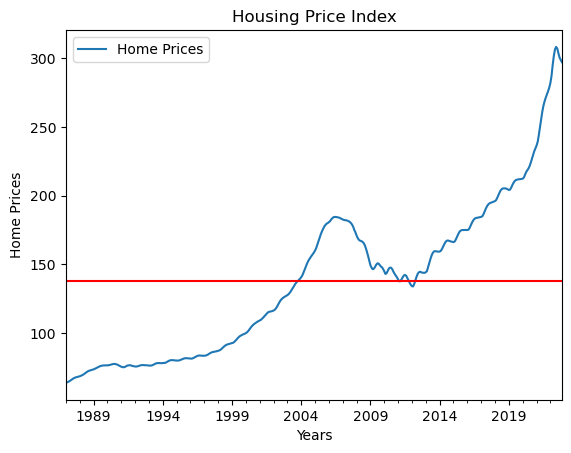

In [39]:
mean = df.mean()[0]

df.plot()
plt.title('Housing Price Index')
plt.axhline(y = mean, color='red', linestyle='-')
plt.xlabel('Years')
plt.ylabel('Home Prices')
plt.legend(['Home Prices'])
plt.show()

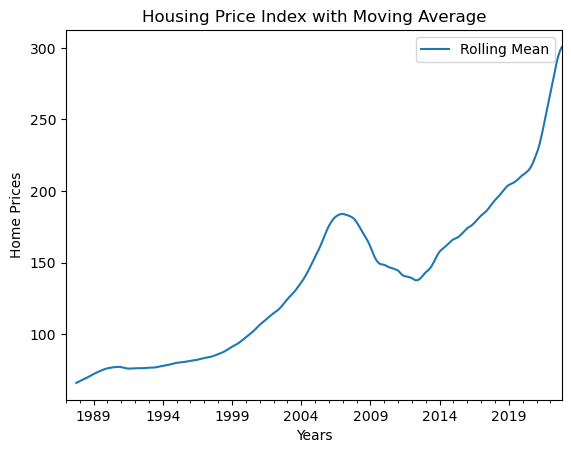

In [38]:
window_size = 10 # adjust this value to change the window size of the moving average
rolling_mean = df.rolling(window=window_size).mean()
rolling_mean.plot()
plt.title('Housing Price Index with Moving Average')
plt.xlabel('Years')
plt.ylabel('Home Prices')
plt.legend(['Rolling Mean'])
plt.show()

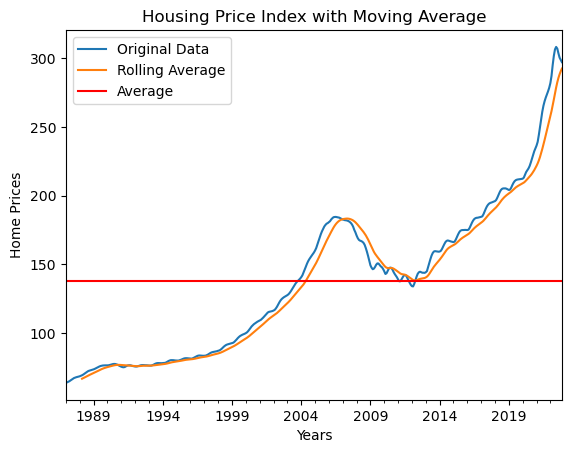

In [55]:
window_size = 15 # adjust this value to change the window size of the moving average
rolling_mean = df.rolling(window=window_size).mean()

ax = df.plot()
rolling_mean.plot(ax=ax)
plt.axhline(y=mean, color='red', linestyle='-')
plt.title('Housing Price Index with Moving Average')
plt.xlabel('Years')
plt.ylabel('Home Prices')
plt.legend(['Original Data', 'Rolling Average', 'Average'])
plt.show()

In [86]:
import requests

url = "https://api.cryptoslam.io/9vtih9mrf0giktml/v1/collections/top-100"
headers = {
  "X-BLOBR-KEY": "pdfbKIFFDgLjA8Hdar49E1Otj8vDAQ7w"
}

response = requests.get(url, headers=headers)

print(response.text)

{"data":[{"rank":1,"collectionImageURL":"https://d1nht67oz99wd1.cloudfront.net/sewer.PNG","collectionName":"Sewer Pass","collectionId":"sewer-pass","paymentToken":"ETH","buyerCount":396,"sellerCount":354,"transactionCount":624,"salesVolumeChangePercentage":26.5939076230951,"blockchainId":"ethereum","quote":{"USD":{"salesVolume":3149741.67,"previousSalesVolume":2488067.34},"ETH":{"salesVolume":1876.81592304807,"previousSalesVolume":1518.98800176382}}},{"rank":2,"collectionImageURL":"https://i.seadn.io/gae/lHexKRMpw-aoSyB1WdFBff5yfANLReFxHzt1DOj_sg7mS14yARpuvYcUtsyyx-Nkpk6WTcUPFoG53VnLJezYi8hAs0OxNZwlw6Y-dmI?auto=format&w=1920","collectionName":"Mutant Ape Yacht Club ","collectionId":"mutant-ape-yacht-club-","paymentToken":"ETH","buyerCount":63,"sellerCount":71,"transactionCount":104,"salesVolumeChangePercentage":42.1785090186791,"blockchainId":"ethereum","quote":{"USD":{"salesVolume":2591563.92,"previousSalesVolume":1822753.62},"ETH":{"salesVolume":1540.08961141109,"previousSalesVolume"

In [87]:
response

<Response [200]>

In [88]:
json = response.json()
json

{'data': [{'rank': 1,
   'collectionImageURL': 'https://d1nht67oz99wd1.cloudfront.net/sewer.PNG',
   'collectionName': 'Sewer Pass',
   'collectionId': 'sewer-pass',
   'paymentToken': 'ETH',
   'buyerCount': 396,
   'sellerCount': 354,
   'transactionCount': 624,
   'salesVolumeChangePercentage': 26.5939076230951,
   'blockchainId': 'ethereum',
   'quote': {'USD': {'salesVolume': 3149741.67,
     'previousSalesVolume': 2488067.34},
    'ETH': {'salesVolume': 1876.81592304807,
     'previousSalesVolume': 1518.98800176382}}},
  {'rank': 2,
   'collectionImageURL': 'https://i.seadn.io/gae/lHexKRMpw-aoSyB1WdFBff5yfANLReFxHzt1DOj_sg7mS14yARpuvYcUtsyyx-Nkpk6WTcUPFoG53VnLJezYi8hAs0OxNZwlw6Y-dmI?auto=format&w=1920',
   'collectionName': 'Mutant Ape Yacht Club ',
   'collectionId': 'mutant-ape-yacht-club-',
   'paymentToken': 'ETH',
   'buyerCount': 63,
   'sellerCount': 71,
   'transactionCount': 104,
   'salesVolumeChangePercentage': 42.1785090186791,
   'blockchainId': 'ethereum',
   'quote

In [90]:
pd.options.display.max_rows = None
df = pd.DataFrame(json['data'])
df.head()

,rank,collectionImageURL,collectionName,collectionId,paymentToken,buyerCount,sellerCount,transactionCount,salesVolumeChangePercentage,blockchainId,quote
0,1,https://d1nht67oz99wd1.cloudfront.net/sewer.PNG,Sewer Pass,sewer-pass,ETH,396,354,624,26.593908,ethereum,"{'USD': {'salesVolume': 3149741.67, 'previousS..."
1,2,https://i.seadn.io/gae/lHexKRMpw-aoSyB1WdFBff5...,Mutant Ape Yacht Club,mutant-ape-yacht-club-,ETH,63,71,104,42.178509,ethereum,"{'USD': {'salesVolume': 2591563.92, 'previousS..."
2,3,https://cryptoslam-token-images.s3.amazonaws.c...,Bored Ape Yacht Club,bored-ape-yacht-club,ETH,16,16,19,-46.677489,ethereum,"{'USD': {'salesVolume': 2442947.22, 'previousS..."
3,4,https://cryptoslam-token-images.s3.amazonaws.c...,CloneX,clonex,ETH,55,64,266,231.708001,ethereum,"{'USD': {'salesVolume': 2317056.81, 'previousS..."
4,5,https://d1nht67oz99wd1.cloudfront.net/checks.PNG,Checks - VV Edition,checks---vv-edition,ETH,346,294,533,-20.402282,ethereum,"{'USD': {'salesVolume': 2217015.82, 'previousS..."


In [95]:
df.set_index('rank', inplace = True)

In [96]:
df

,collectionImageURL,collectionName,collectionId,paymentToken,buyerCount,sellerCount,transactionCount,salesVolumeChangePercentage,blockchainId,quote
rank,,,,,,,,,,
1,https://d1nht67oz99wd1.cloudfront.net/sewer.PNG,Sewer Pass,sewer-pass,ETH,396,354,624,26.593908,ethereum,"{'USD': {'salesVolume': 3149741.67, 'previousS..."
2,https://i.seadn.io/gae/lHexKRMpw-aoSyB1WdFBff5...,Mutant Ape Yacht Club,mutant-ape-yacht-club-,ETH,63,71,104,42.178509,ethereum,"{'USD': {'salesVolume': 2591563.92, 'previousS..."
3,https://cryptoslam-token-images.s3.amazonaws.c...,Bored Ape Yacht Club,bored-ape-yacht-club,ETH,16,16,19,-46.677489,ethereum,"{'USD': {'salesVolume': 2442947.22, 'previousS..."
4,https://cryptoslam-token-images.s3.amazonaws.c...,CloneX,clonex,ETH,55,64,266,231.708001,ethereum,"{'USD': {'salesVolume': 2317056.81, 'previousS..."
5,https://d1nht67oz99wd1.cloudfront.net/checks.PNG,Checks - VV Edition,checks---vv-edition,ETH,346,294,533,-20.402282,ethereum,"{'USD': {'salesVolume': 2217015.82, 'previousS..."
6,https://cryptoslam-token-images.s3.amazonaws.c...,Otherdeed,otherdeed,ETH,178,186,568,-21.121364,ethereum,"{'USD': {'salesVolume': 2104152.27, 'previousS..."
7,https://d1nht67oz99wd1.cloudfront.net/akcb.jpg,a KID called BEAST,a-kid-called-beast,ETH,516,655,851,110.389563,ethereum,"{'USD': {'salesVolume': 1706688.15, 'previousS..."
8,https://d1nht67oz99wd1.cloudfront.net/pudgypen...,Pudgy Penguins,pudgy-penguins,ETH,52,46,172,245.659196,ethereum,"{'USD': {'salesVolume': 1657752.92, 'previousS..."
9,https://i.seadn.io/gae/H8jOCJuQokNqGBpkBN5wk1o...,Azuki,azuki,ETH,43,39,58,-3.699418,ethereum,"{'USD': {'salesVolume': 1403299.76, 'previousS..."


In [99]:
df.iloc[0,0]

'https://d1nht67oz99wd1.cloudfront.net/sewer.PNG'

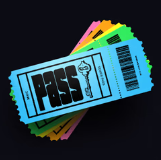

In [105]:
from IPython.display import Image, display

display(Image(df.iloc[0,0]))